# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from skimage.color import rgb2gray,rgba2rgb

In [3]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

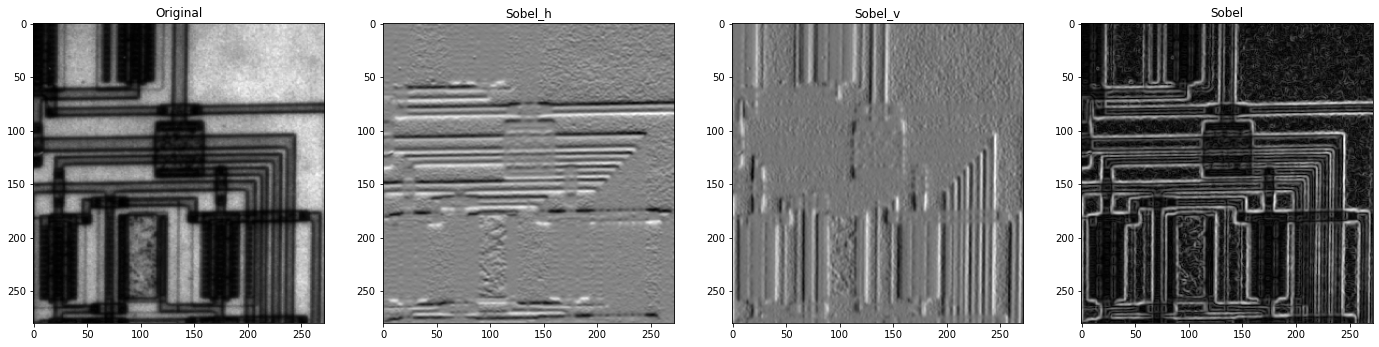

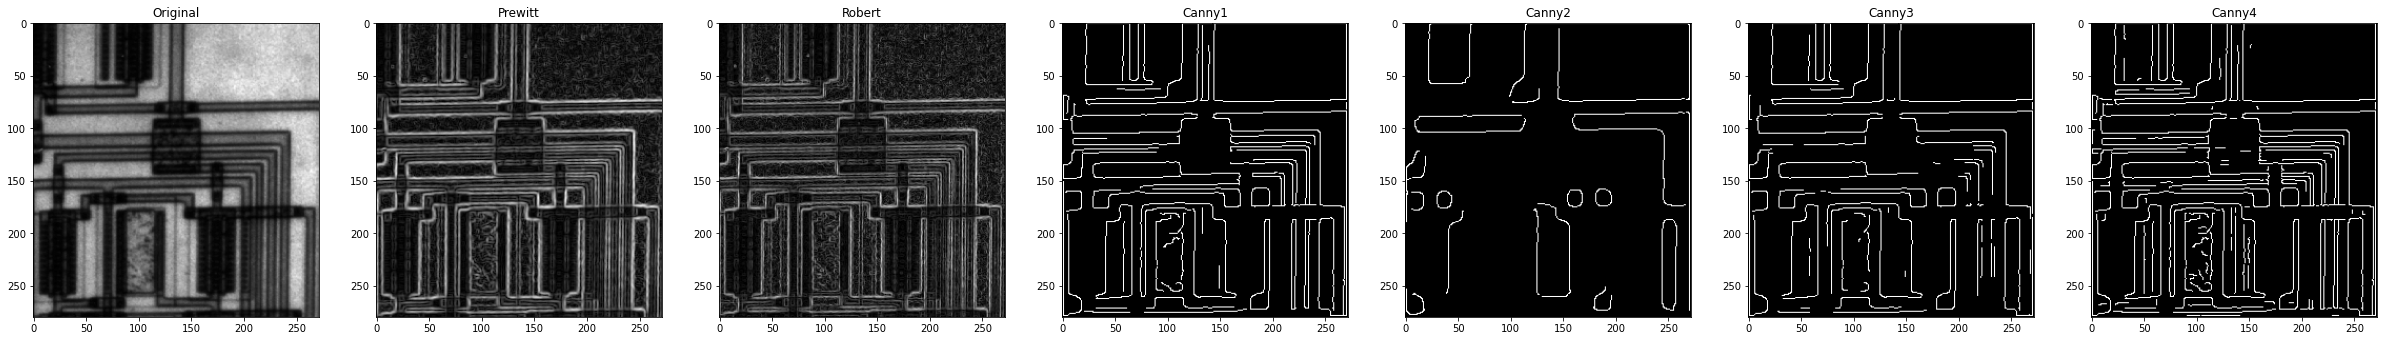

In [4]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

img = io.imread('circuit.tif')
sobel_h_img=sobel_h(img)
sobel_v_img=sobel_v(img)
sobel_img=sobel(img)
prewitt_img=prewitt(img)
robert_img=roberts(img)
canny_img1=canny(img,sigma = 1.5, low_threshold=40, high_threshold=70)
canny_img2=canny(img,sigma = 4, low_threshold=40, high_threshold=70)
canny_img3=canny(img,sigma = 1.5, low_threshold=60, high_threshold=70)
canny_img4=canny(img,sigma = 1.5, low_threshold=40, high_threshold=50)
show_images([img,sobel_h_img,sobel_v_img,sobel_img],["Original","Sobel_h","Sobel_v","Sobel"])
show_images([img,prewitt_img,robert_img,canny_img1,canny_img2,canny_img3,canny_img4],["Original","Prewitt","Robert","Canny1","Canny2","Canny3","Canny4"])


# Sigma: Standard deviation of the Gaussian filter. Good values to start with are between 0.6 and 2.4. Smaller filters cause less blurring, and allow detection of small, sharp lines. A larger filter increases processing time and causes more blurring.

# Low and High thresholds: A threshold set too high can miss important information. On the other hand, a threshold set too low will falsely identify irrelevant information (such as noise) as important. 0.2-0.5 are good starting values for the low threshold; 0.6-0.9 are good starting values for the high threshold.




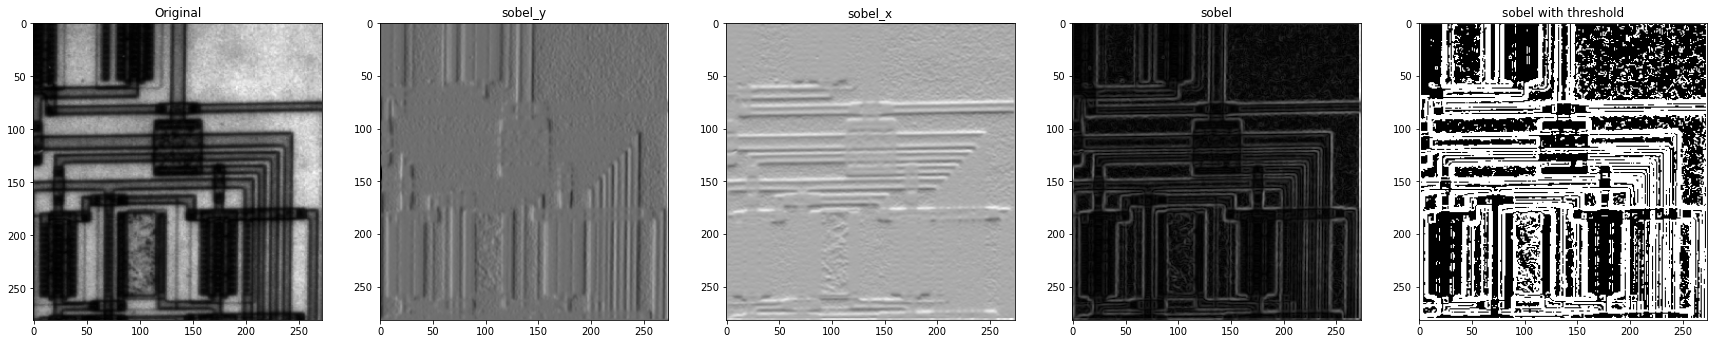

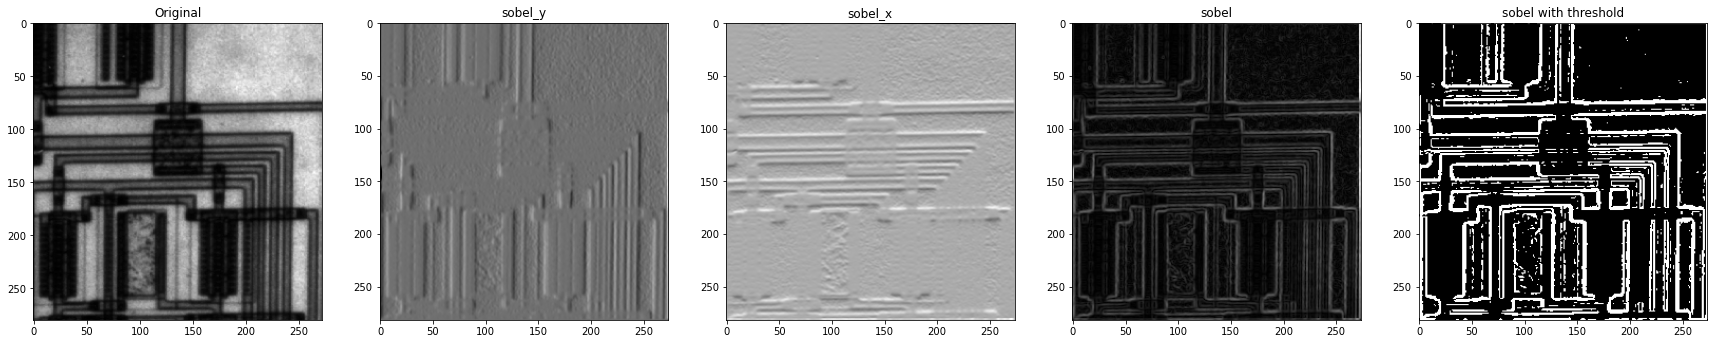

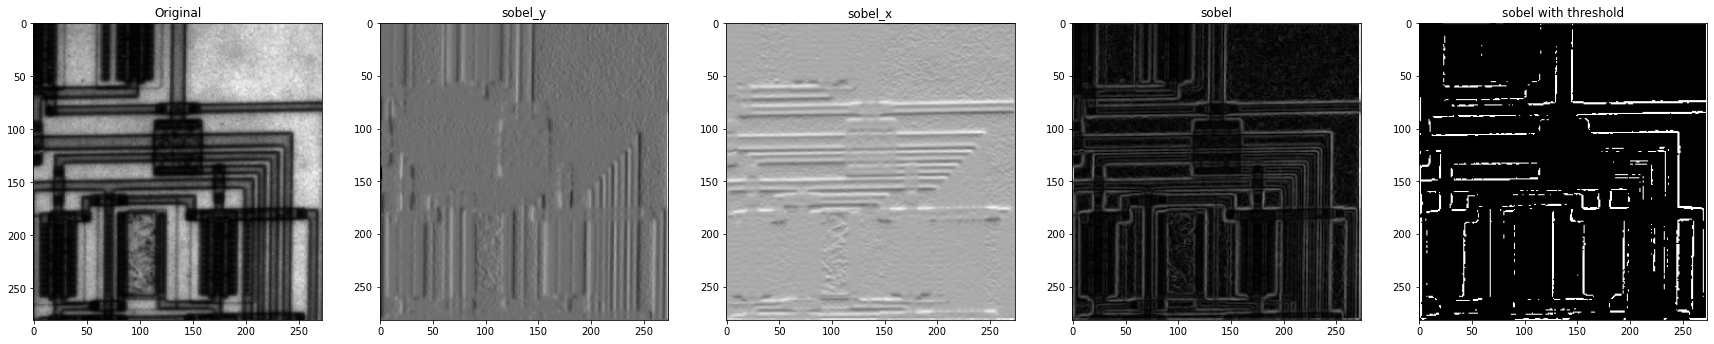

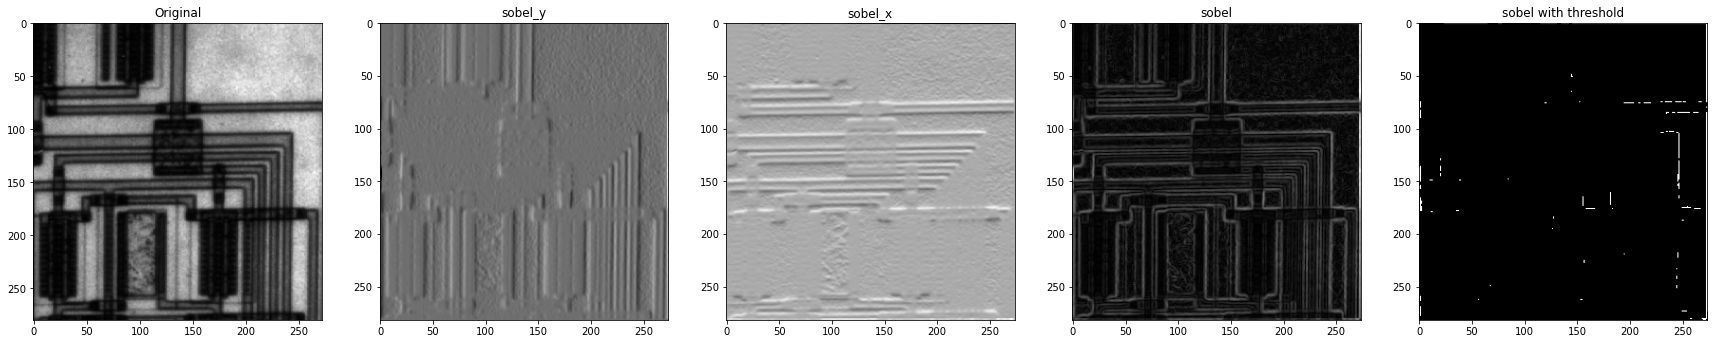

In [5]:
# 2. Custom Sobel (V-H-Both)
def customSobel(img,threshold):
    img_gray=img.astype(np.uint8)
    sobelY=[[-1,0,1 ],[-2,0,2 ],[-1,0,1]]
    sobelX=[[-1,-2,-1],[0 ,0 , 0],[1 ,2 , 1]]
    convolvedY=convolve2d(img_gray,sobelY)
    convolvedX=convolve2d(img_gray,sobelX)
    
    convolvedXY = np.sqrt(np.square(convolvedX)+np.square(convolvedY))
    result = np.where(convolvedXY > threshold, 1, 0)
    
    show_images([img_gray,convolvedY,convolvedX,convolvedXY,result],["Original","sobel_y","sobel_x","sobel","sobel with threshold"])
    
    
img = io.imread('circuit.tif')
customSobel(img,50)
customSobel(img,100)
customSobel(img,175)
customSobel(img,250)



## threshold >>
## sensitivity to noise <<
## but fine details <<


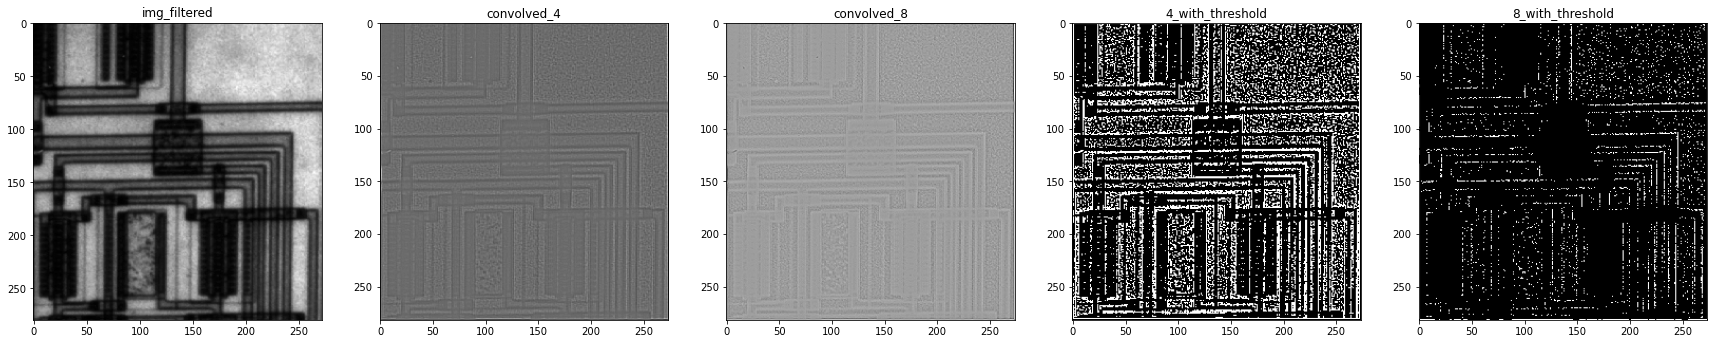

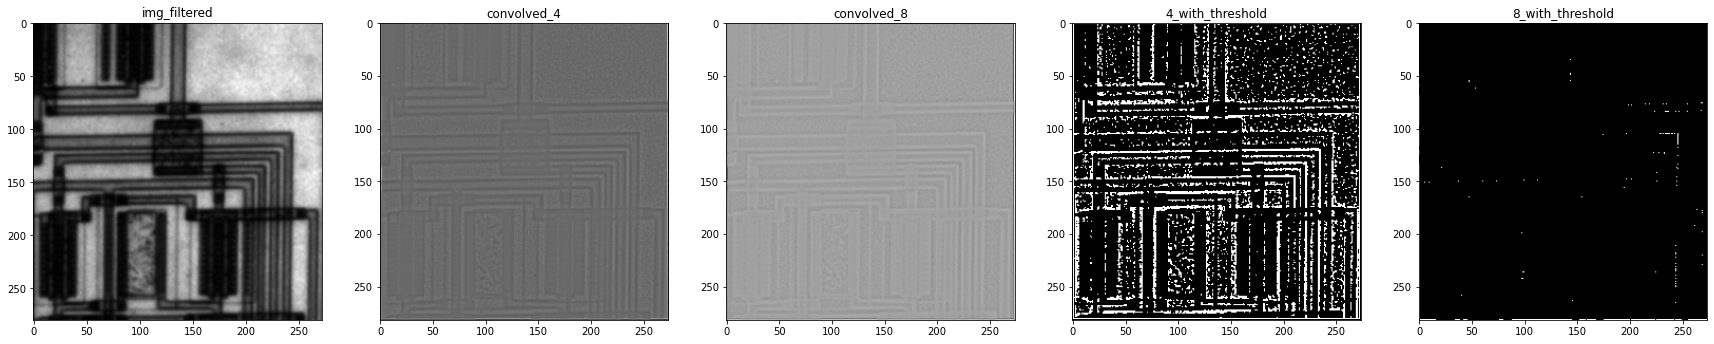

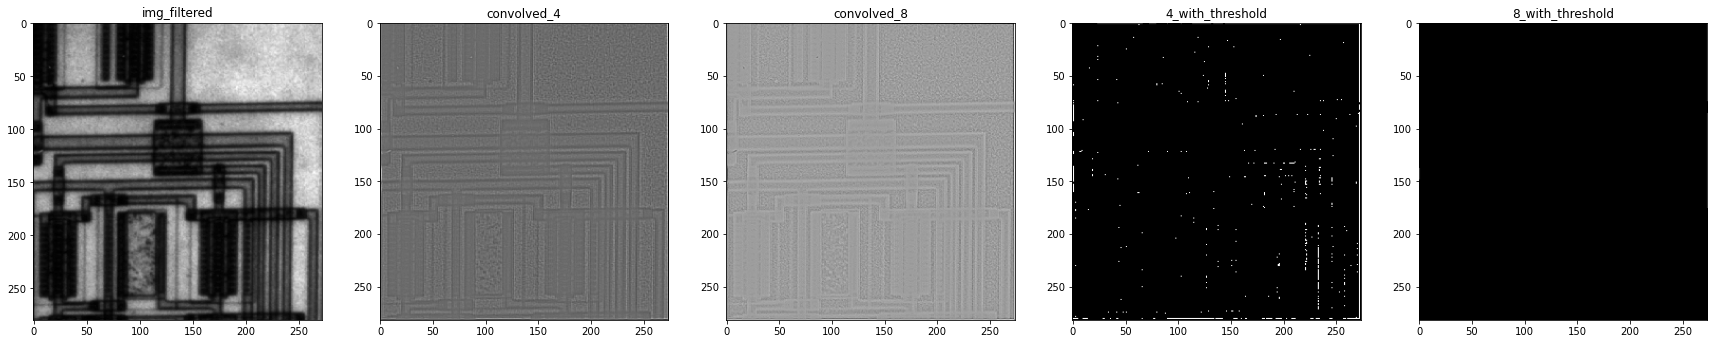

In [29]:
# 3. Custom LoG
from scipy import ndimage
thres= 20

def LOG(img,threshold,sig):
    img_gray=img.astype(np.uint8)
    img_filtered =ndimage.gaussian_filter(img_gray,sigma=sig)
    
    f1=[[-1,-1,-1 ],[-1,8,-1],[-1,-1,-1 ]]
    f2=[[ 0,1,0],[1,-4,1],[ 0,1,0]]
    
    convolved1=convolve2d(img_filtered,f1)
    convolved2=convolve2d(img_filtered,f2)
    
    result1=np.where(convolved1>threshold,1,0)
    result2=np.where(convolved2>threshold,1,0)
    
    show_images([img_filtered,convolved1,convolved2,result1,result2],["img_filtered","convolved_4","convolved_8","4_with_threshold","8_with_threshold"])
    
img = io.imread('circuit.tif')
LOG(img,20,0.03)
LOG(img,20,0.7)
LOG(img,100,0.03)
    

[[0.87876588 0.87876588 0.87876588 ... 0.80902588 0.80902588 0.80902588]
 [0.87876588 0.87876588 0.87876588 ... 0.80902588 0.80902588 0.80902588]
 [0.87876588 0.87876588 0.87876588 ... 0.80902588 0.80902588 0.80902588]
 ...
 [0.90789137 0.90789137 0.90789137 ... 0.9039698  0.9039698  0.9039698 ]
 [0.90789137 0.90789137 0.90789137 ... 0.9039698  0.9039698  0.9039698 ]
 [0.90789137 0.90789137 0.90789137 ... 0.9039698  0.9039698  0.9039698 ]]
<<<<<<<<<<<<<<<<<<
[[5.00466971e-15 5.00466971e-15 5.00466971e-15 ... 1.00093394e-14
  1.00093394e-14 1.00093394e-14]
 [5.00466971e-15 5.00466971e-15 5.00466971e-15 ... 1.00093394e-14
  1.00093394e-14 1.00093394e-14]
 [5.00466971e-15 5.00466971e-15 5.00466971e-15 ... 1.00093394e-14
  1.00093394e-14 1.00093394e-14]
 ...
 [1.00093394e-14 1.00093394e-14 1.00093394e-14 ... 1.00093394e-14
  1.00093394e-14 1.00093394e-14]
 [1.00093394e-14 1.00093394e-14 1.00093394e-14 ... 1.00093394e-14
  1.00093394e-14 1.00093394e-14]
 [1.00093394e-14 1.00093394e-14 1.000

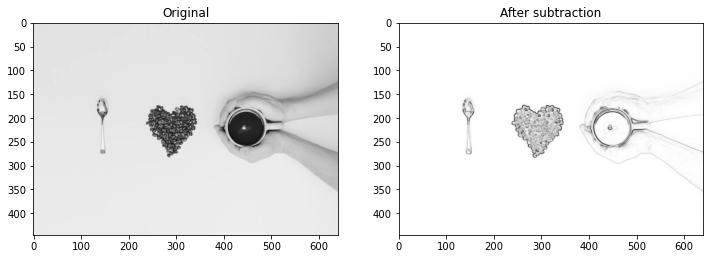

In [28]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

img = rgb2gray(io.imread('coffee.jpeg'))
print(img)
print("<<<<<<<<<<<<<<<<<<")
sobel_img=sobel(img)*255
print(sobel_img)
print("<<<<<<<<<<<<<<<<<<")
sobel_img = sobel_img*0.7

sobel_img = img - sobel_img
print(sobel_img)
show_images( [img, sobel_img],['Original', 'After subtraction'])